# Trabajo Practico 5
## Nicolas Pereyra

Se puede obserbar en la imagan del bode que el filtro analizado es un filtro Notch-Pasa Bajos acoplado con un filtro Pasa altos con la misma frecuencia de paso que el filtro Notch. Sabiendo esto podemos intuir que la traferencia del circuito tendra la siguiente forma.  
$T_{lp}=\frac{w_o}{s+w_o}a*\frac{s²+k²w_o²}{s²+s\frac{w_o}{q}+w_o²}$  
Y para el filtro pasa altos pedido sera la siguiente:  
$T_{hp}=\frac{s}{s+w_o}a.k²\frac{s²+\frac{w_o²}{k²}}{s²+s\frac{w_o}{q}+w_o²}$  
  
La variable $k$ determina la distancia respecto de la frecuencia de corte en la que se encuentre el cero de transmision. En este caso el cero se encuentra a una distancia de $3$ veces la frecuencia de corte, por lo tanto $k = 3$.  
Por otro lado la variable $a$ es una variable que que se obtubo experimentalmente en para que que la transferencia tenga una ganancia maxima de $0db$. El valor de $a$ obtenido fue de $a = 0.1$  
  
Con todo esto listo solo falta conocer el denominar el cual es un es el mismo que un butter de 3° orden, $(s+1)(s²+s+1)$

#### Transferencia de filtro Notch-Pasa Bajos(Normalizdo):

(1,
 array([<Axes: title={'center': 'Magnitude response'}, ylabel='Magnitude [dB]'>,
        <Axes: title={'center': 'Phase response'}, xlabel='Angular frequency [rad/sec]', ylabel='Phase [rad]'>],
       dtype=object))

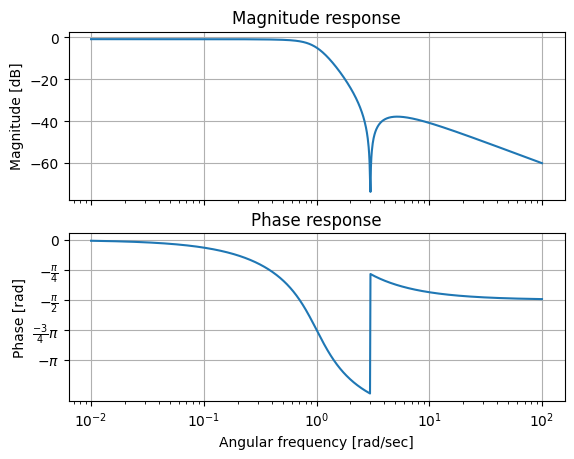

In [6]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from pytc2.sistemas_lineales import analyze_sys, pretty_print_bicuad_omegayq, tf2sos_analog, pretty_print_SOS, bodePlot
from pytc2.general import print_subtitle

#Titulo
print_subtitle('Transferencia de filtro Notch-Pasa Bajos(Normalizdo):')

#Variables
a = 0.1
k = 3
wo = 100*2*np.pi

##Denominador y Numerador
b_lp = [a , 0, a*k**2]
a_lp = [1, 2, 2, 1]

#Tf
lp = signal.TransferFunction(b_lp,a_lp)

#Plot
bodePlot(lp)

#### Transferencia de filtro Notch-Pasa Altos(Normalizdo):

<IPython.core.display.Math object>

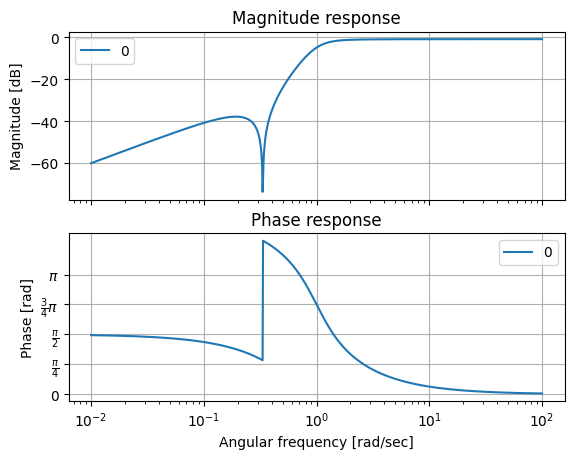

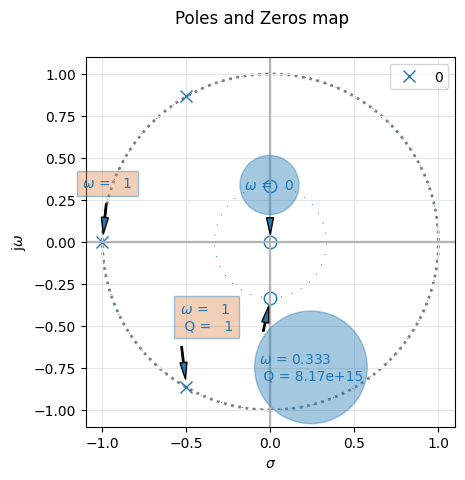

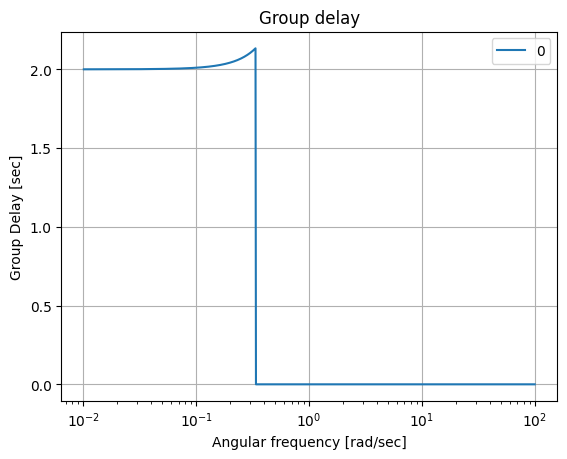

In [7]:
## Denominador y Numerador
b_hp = [a*k**2, 0, a, 0]
a_hp = [1, 2, 2, 1]

##Tf
hp = signal.TransferFunction(b_hp,a_hp)

## Ecuacion
print_subtitle('Transferencia de filtro Notch-Pasa Altos(Normalizdo):')

hp_ = tf2sos_analog(b_hp,a_hp)
pretty_print_SOS(hp_)

##Print
analyze_sys(hp)

Como se puede observvvar el filtro no posee un cero en la precuecia correspondiete, esta se encuentra levemente corrido como se observa en el siguiente grafico:

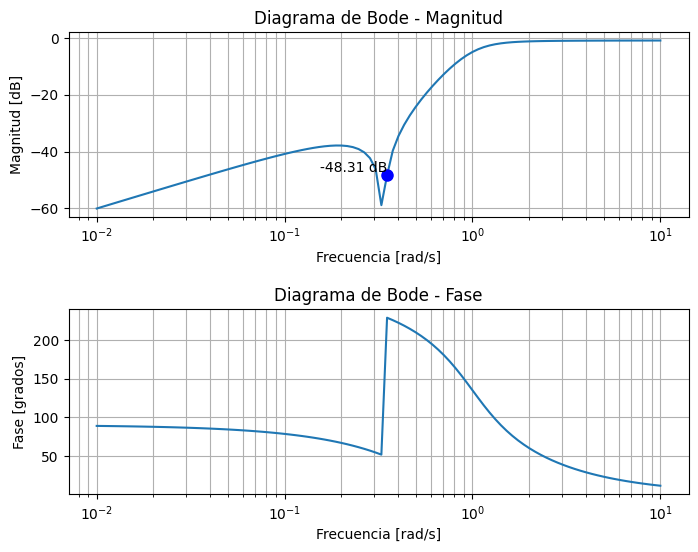

In [30]:
cero = 1/3
# Generar el grillado de frecuencias
w, mag, phase = signal.bode(hp)

# Crear la figura y los subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
fig.subplots_adjust(hspace=0.5)

# Graficar la magnitud en dB con grillado
ax1.semilogx(w, mag)
ax1.set_xscale('log')
ax1.set_xlabel('Frecuencia [rad/s]')
ax1.set_ylabel('Magnitud [dB]')
ax1.set_title('Diagrama de Bode - Magnitud')
ax1.grid(True, which="both")

# Marcar Omega0
idx_2 = np.where(w >= (cero))[0][0]
mag_marker_2 = mag[idx_2]
ax1.plot(w[idx_2], mag[idx_2], 'bo', markersize=8)
ax1.text(w[idx_2], mag[idx_2], f'{mag_marker_2:.2f} dB', ha='right', va='bottom')

# Graficar la fase en grados con grillado
ax2.semilogx(w, phase)
ax2.set_xscale('log')
ax2.set_xlabel('Frecuencia [rad/s]')
ax2.set_ylabel('Fase [grados]')
ax2.set_title('Diagrama de Bode - Fase')
ax2.grid(True, which="both")

# Mostrar la figura
plt.show()

Esto se debe a que el filtro es de maxima planicidad y no es butterwoth como primeramente supusimos y por lo tanto $\epsilon \neq 1$. Para solucionar esto obtuve experimentalme el un valor de $w_b$ que sea capas de correr el cero al lugar que nosotros deseamos, siendo $w_b = \epsilon^{-1/n}$. El valor obtenido fue $w_b = 1.05 \Rightarrow \epsilon = 0.907$. Quedando el grafico de la siguiente forma:

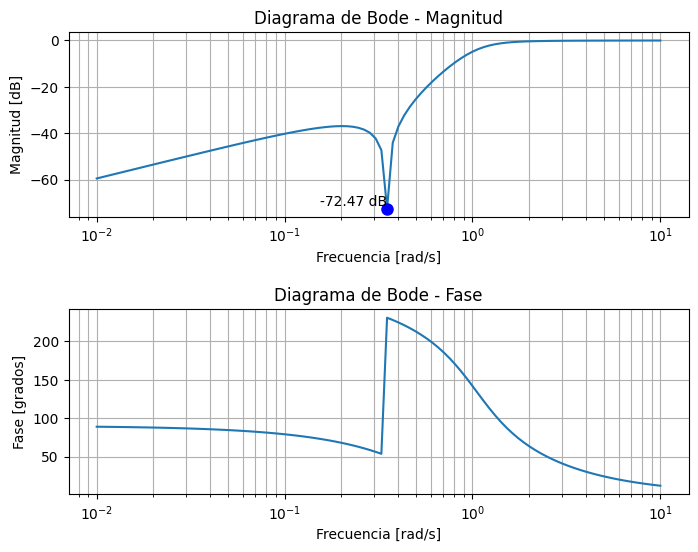

In [34]:
cero = 1/3
wb = 1.05

hp = signal.TransferFunction([1, 0,1/9*wb**2, 0 ], [1, 2*wb ,2 *wb**2,1*wb**3])
# Generar el grillado de frecuencias
w, mag, phase = signal.bode(hp)

# Crear la figura y los subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
fig.subplots_adjust(hspace=0.5)

# Graficar la magnitud en dB con grillado
ax1.semilogx(w, mag)
ax1.set_xscale('log')
ax1.set_xlabel('Frecuencia [rad/s]')
ax1.set_ylabel('Magnitud [dB]')
ax1.set_title('Diagrama de Bode - Magnitud')
ax1.grid(True, which="both")

# Marcar Omega0
idx_2 = np.where(w >= (cero))[0][0]
mag_marker_2 = mag[idx_2]
ax1.plot(w[idx_2], mag[idx_2], 'bo', markersize=8)
ax1.text(w[idx_2], mag[idx_2], f'{mag_marker_2:.2f} dB', ha='right', va='bottom')

# Graficar la fase en grados con grillado
ax2.semilogx(w, phase)
ax2.set_xscale('log')
ax2.set_xlabel('Frecuencia [rad/s]')
ax2.set_ylabel('Fase [grados]')
ax2.set_title('Diagrama de Bode - Fase')
ax2.grid(True, which="both")

# Mostrar la figura
plt.show()

#### Transferencia de filtro Notch-Pasa Altos(Desnormalizdo):

(1,
 array([<Axes: title={'center': 'Magnitude response'}, ylabel='Magnitude [dB]'>,
        <Axes: title={'center': 'Phase response'}, xlabel='Angular frequency [rad/sec]', ylabel='Phase [rad]'>],
       dtype=object))

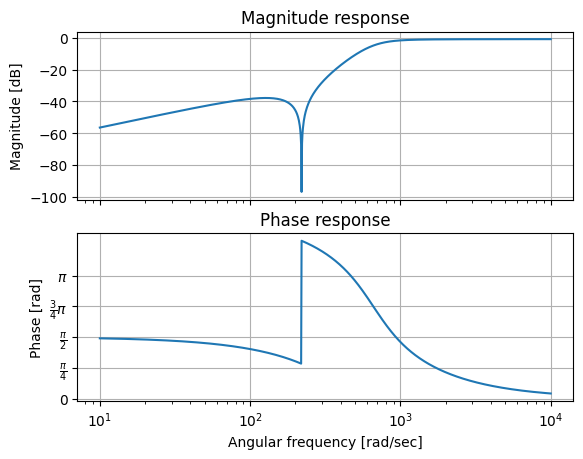

In [32]:
## Denominador y Numerador
b_hpdes = [a*k**2, 0, a*(wo*wb)**2, 0]
a_hpdes = [1, 2*(wo*wb), 2*(wo*wb)**2, (wo*wb)**3]

##Tf
hpdes = signal.TransferFunction(b_hpdes,a_hpdes)

## Ecuacion
print_subtitle('Transferencia de filtro Notch-Pasa Altos(Desnormalizdo):')
    
##Print
bodePlot(hpdes)

$T_{hp}=\frac{0.9.s}{s²+1.05.300.2.\pi}\frac{s²+\frac{(1.05.300.2.\pi)²}{3²}}{s²+s.1.05.300.2.\pi+(1.05.300.2.\pi)²}$  
$T_{hp}=\frac{0.9.s}{s+1885}\frac{s²+394.78.10³}{s²+s.1885+3.553.10⁶}$  

## Eleccion de componentes:
### Circuito utilizado:
Para poder obtener un circuito que represente la transferencia obtenida debemos colocar a la salida del circuito dado un levantamiento parcial del masas compuesto por un capacitor en serie con una resistencia y una resistencia en derivacion.
### Transferencia del ciruito dado:
$H(s)=\frac{s²+\frac{1}{C².R_5.(R_1-R_2)}}{s²+s.\frac{1}{C.R_1}+\frac{1}{C².R_5.R_2}}$  

Conoderamos que $C = 0.1\mu F$:  
$\frac{1}{C.R_1} = 1885$  
$\frac{1}{C².R_5.R_2} = 3.553.10⁶$  
$\frac{1}{C².R_5.(R_2-R_1)} = 394.78.10³$  

Componentes:  
$R_1 = 5.3 k\Omega$  
$R_2 = 4.7 k\Omega$  
$R_5 = 5.97 k\Omega$  

### Transferencia circuito agregado:
$H(s) = \frac{Z_2}{Z_1+Z_2}=\frac{R}{\frac{1}{s.C}+R} = \frac{s}{s+\frac{1}{C.R}}$

Componentes:
$C = 0.1\mu F$  
$R = 5305 \Omega$  

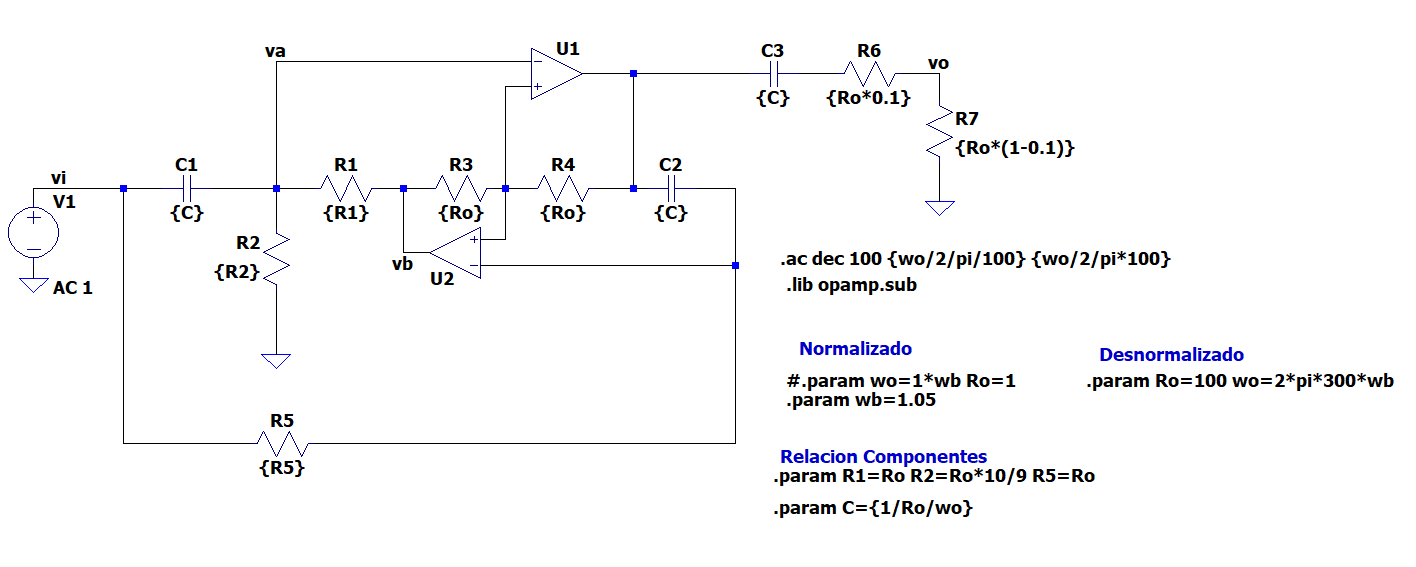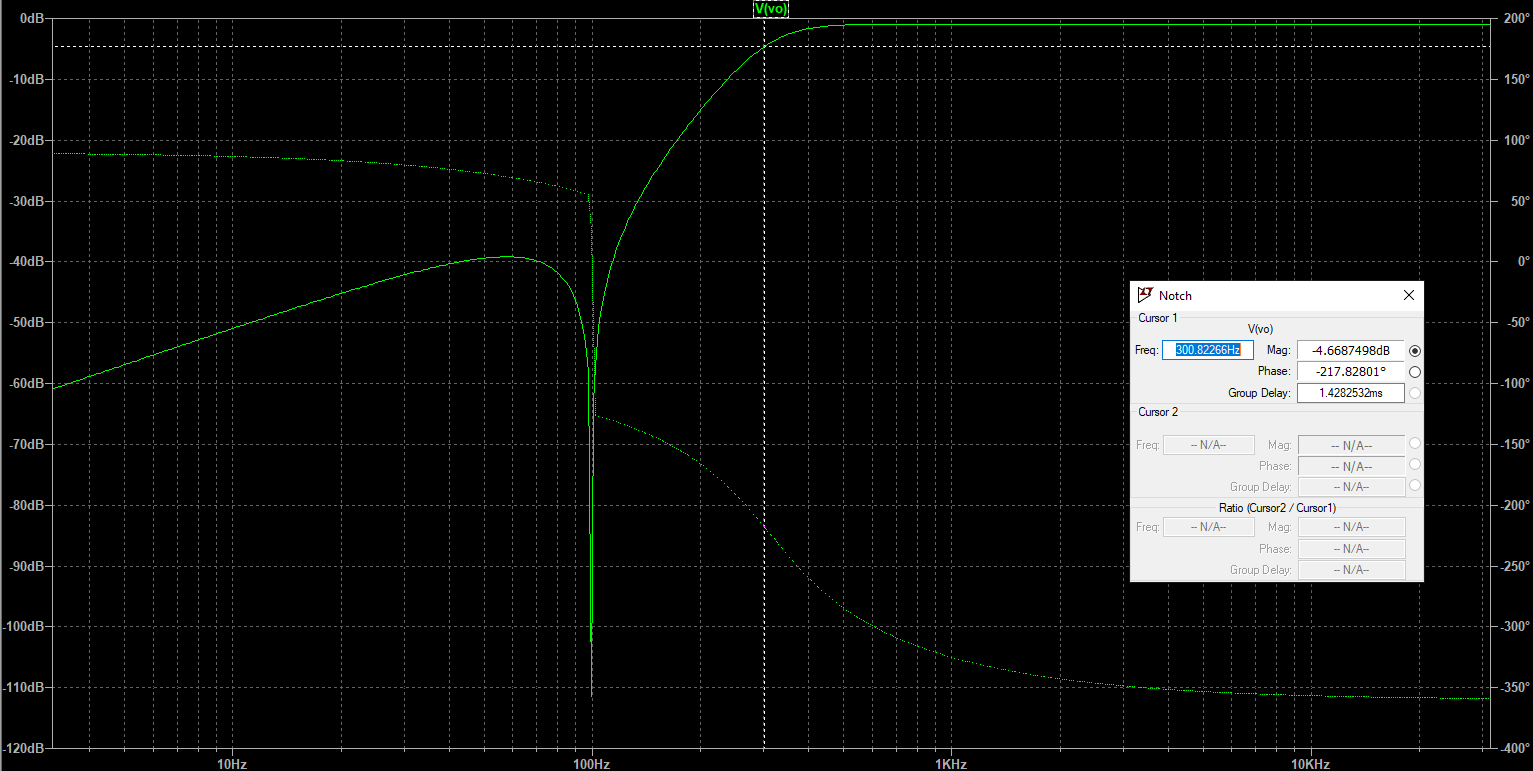

## Circuito propuesto por Schauman:
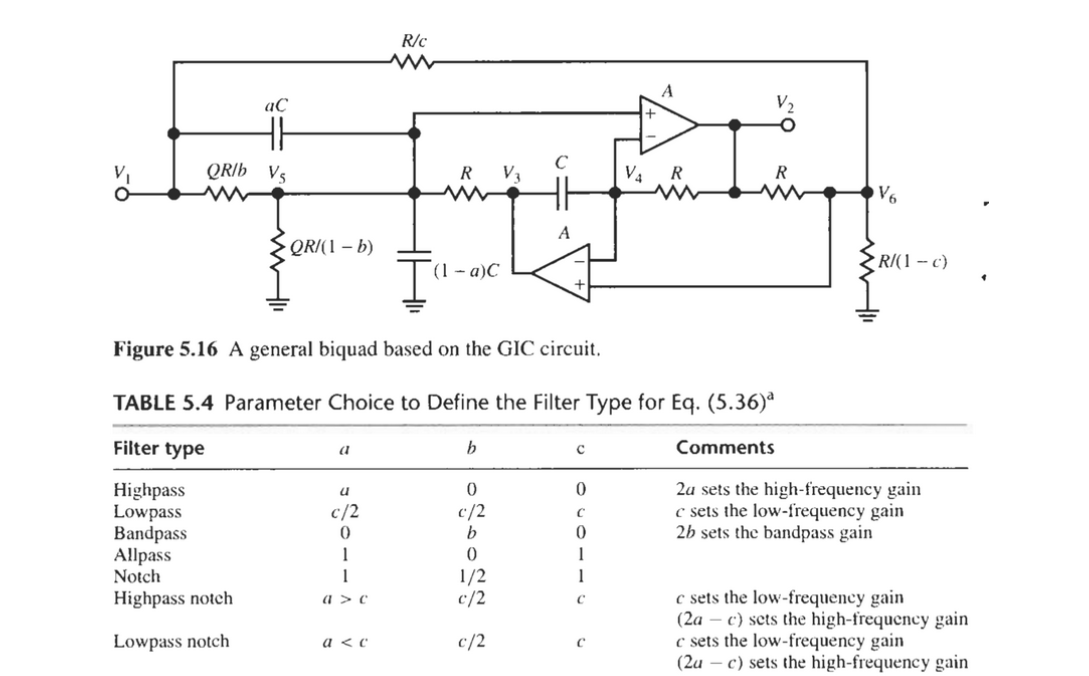
$T(s) = \frac{s².(2a-c)+s.\frac{w_o}{Q}(2b-c)+c.w_o²}{s²+s.\frac{w_o}{q}+w_o²} \Rightarrow w_o = \frac{1}{C.R}$  
$C = 0.1 \mu F$  
$R = 5305 \Omega$  
  
### Valores de las variables:  
$T_{2°orden}=\frac{s²+\frac{(300.2.\pi)²}{3²}}{s²+s.300.2.\pi+(300.2.\pi)²} \Rightarrow$ $2a-c = 1$   ;   $2b = c$ ; $c = 1/3²$  
  
$c = 1/9$ ; $b = 1/18$ ; $a = 5/9$ ; $Q = 1$

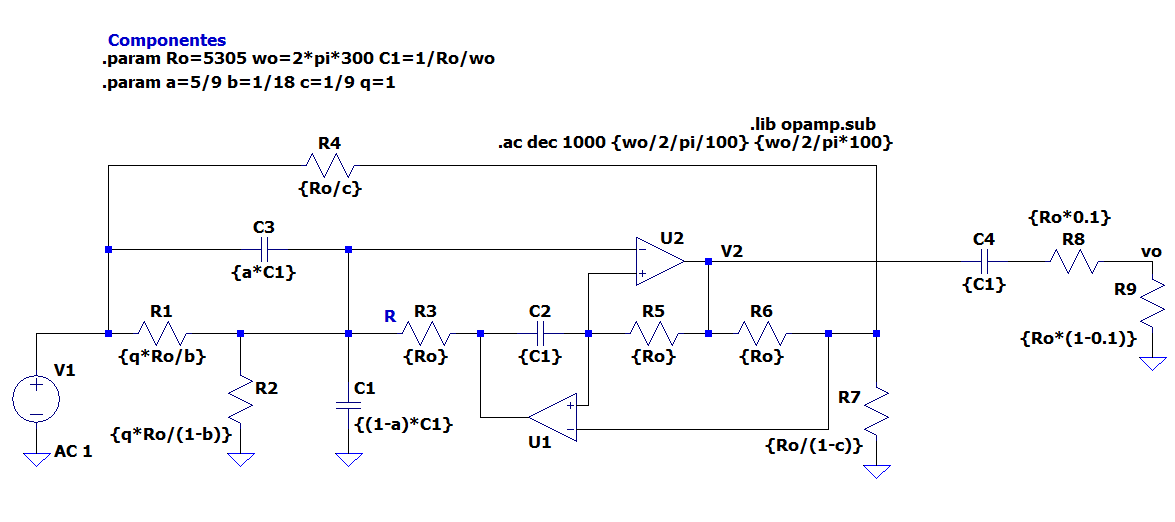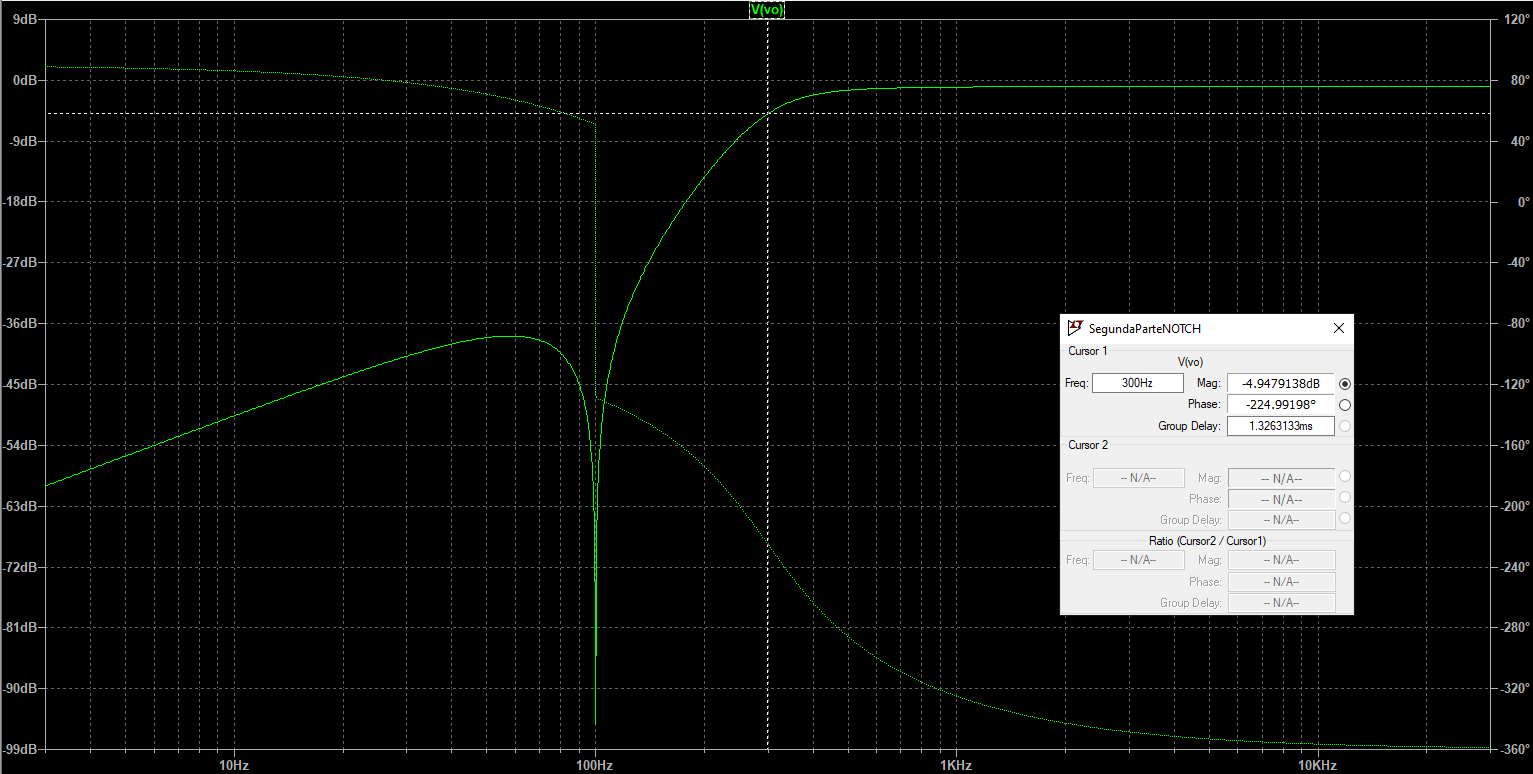

## Similitudes y diferencias entre ambos circuitos:
A lo largo de este trabajo practico pude observar las siguientes similitudes y diferencias entre ambos circuitos. Una similitud ventajosa que observe de ambos circuitos tienen su salida en la salida de un operacional lo que permite extender el circuito y utilizarlo sin la preocupacion del que el circuito deje de filtrar como se diseño en un principio. Otra similitud que se puede observar es que ambos circuitos posen una estuctura similar a la de un gic de Antoniou.  
Por otro lado, las diferencias mas notables entre estos circutos es la gran diferencia entre su cantidad de componentes y grados de livertad que posee cada uno de los circuitos. Permitiendo en el circuito dado 4 tipos diferentes de filtros, Notch, High-Pass Notch, Low-Pass Notch y Pasa altos mientras que por el circuito de schauman permite armar todo tipo de fitros solo variando $a$, $b$ y $c$.

## Apendice:
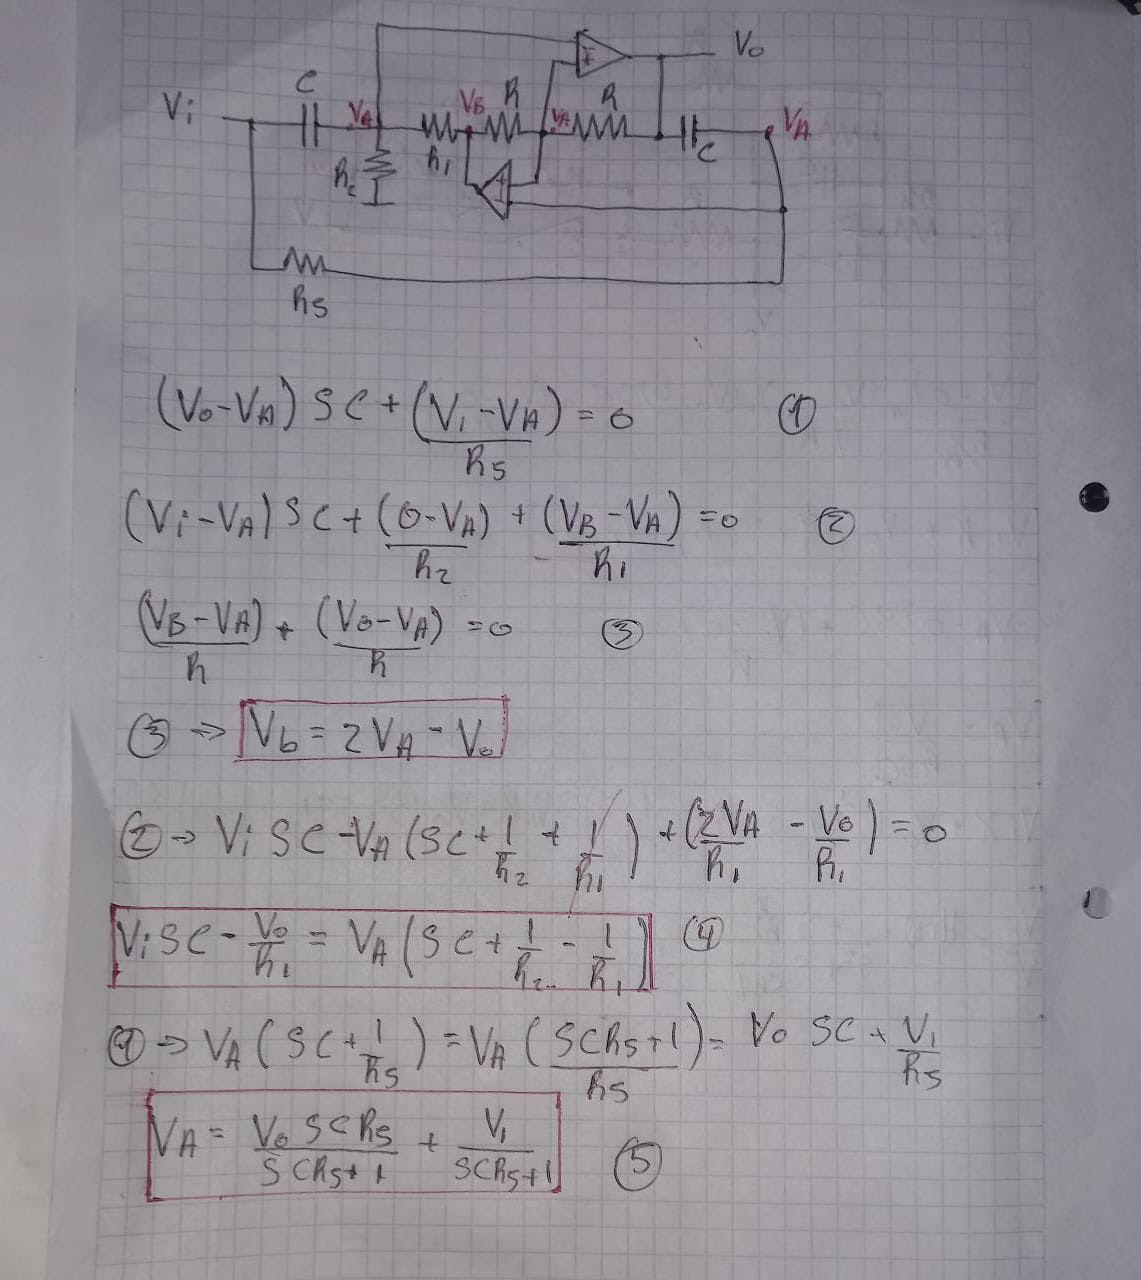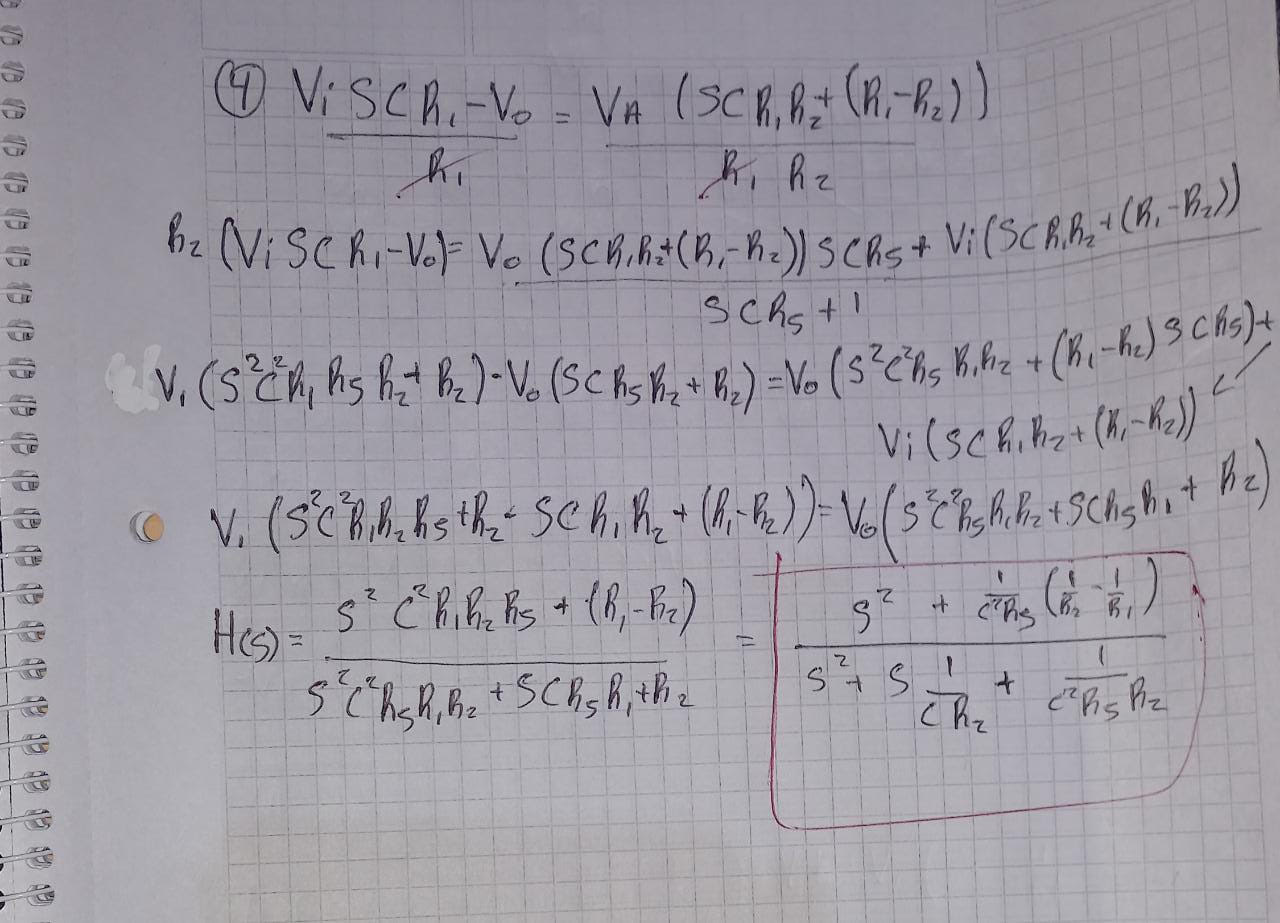